In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [3]:
df_final = pd.read_csv("df_final.csv", index_col = 0)
df_final.sample(10)

,loyalty_number,country,province,city,postal_code,gender,education,marital_status,loyalty_card,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
333586,848615,Canada,British Columbia,Vancouver,V5R 1W3,Female,Doctor,Married,Star,Standard,2016,6,NaN,NaN,2018,8,5,0,5,2180,218,0,0.0,136845.0
388918,207372,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,Single,Star,Standard,2017,12,NaN,NaN,2018,12,13,5,18,4320,432,0,0.0,93733.0
141584,935420,Canada,Ontario,Toronto,M1R 4K3,Male,Bachelor,Married,Aurora,Standard,2012,5,NaN,NaN,2018,3,12,6,18,4392,658,691,56.0,47245.0
205174,282759,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,Married,Aurora,Standard,2018,10,NaN,NaN,2018,1,0,0,0,0,0,0,0.0,67044.0
312117,603371,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,Divorced,Star,Standard,2017,8,NaN,NaN,2018,7,0,0,0,0,0,0,0.0,50906.0
346022,614377,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,Single,Star,Standard,2018,6,NaN,NaN,2018,9,0,0,0,0,0,0,0.0,58823.0
388845,203773,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,Married,Star,Standard,2018,5,NaN,NaN,2018,12,15,9,24,3024,302,0,0.0,50598.0
1682,192250,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,Married,Nova,Standard,2014,9,NaN,NaN,2017,1,10,1,11,1397,139,0,0.0,89900.0
290611,353614,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,Married,Star,Standard,2015,3,2015.0,11.0,2018,6,0,0,0,0,0,0,0.0,65814.0
311750,582690,Canada,Ontario,London,M5B 3E4,Female,Bachelor,Single,Nova,Standard,2016,12,NaN,NaN,2018,7,18,0,18,4446,444,0,0.0,50879.0


In [5]:
# Filtro para incluir solo las columnas que me interesan
df_filtrado = df_final[['flights_booked', 'education']]
df_filtrado.head()

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [6]:
# Agrupo los datos por nivel educativo y calculo los estadísticos descriptivos de los vuelos reservados
agrupado_educacion = df_filtrado.groupby('education')['flights_booked'].describe()

agrupado_educacion 

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [9]:
# Creo los grupos en función del nivel de educación
# Grupo control: 'Doctor', 'Master', 'Bachelor' (ed superior)
# Grupo test: 'College', 'High school or below' (ed inferior)
df_filtrado['education_group'] = np.where(df_filtrado['education'].isin(['Doctor', 'Master', 'Bachelor']), 'Control_superior', 'Test_inferior')

In [10]:
df_filtrado

,flights_booked,education,education_group
0,3,Bachelor,Control_superior
1,10,College,Test_inferior
2,6,College,Test_inferior
3,0,Bachelor,Control_superior
4,0,Bachelor,Control_superior
...,...,...,...
403755,0,College,Test_inferior
403756,0,Doctor,Control_superior
403757,3,Bachelor,Control_superior
403758,0,College,Test_inferior


In [ ]:
#Hipótesis Nula (H0): No hay diferencia significativa en el número de vuelos reservados entre los clientes 
# con niveles educativos considerados "altos" (Doctor, Master, Bachelor) y aquellos con niveles educativos considerados "bajos" 
# (College, High school or below).

#Hipótesis Alternativa (H1): Hay una diferencia significativa en el número de vuelos reservados entre los clientes con niveles 
# educativos considerados "altos" y aquellos con niveles educativos considerados "bajos".

In [11]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   flights_booked   403760 non-null  int64 
 1   education        403760 non-null  object
 2   education_group  403760 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.3+ MB


In [13]:
df_filtrado[df_filtrado['education_group'] == 'Control_superior'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282585 entries, 0 to 403759
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   flights_booked   282585 non-null  int64 
 1   education        282585 non-null  object
 2   education_group  282585 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.6+ MB


In [15]:
df_filtrado[df_filtrado['education_group'] == 'test_inferior'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flights_booked   0 non-null      int64 
 1   education        0 non-null      object
 2   education_group  0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


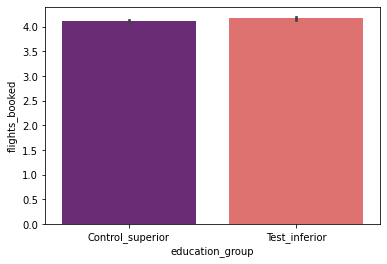

In [17]:
sns.barplot(x = "education_group", y = "flights_booked", data = df_filtrado, palette = "magma");

In [24]:
#normalidad shapiro
#lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [29]:
normalidad(df_filtrado, "flights_booked")

Para la columna flights_booked los datos no siguen una distribución normal.


In [31]:
# El t-test es una prueba estadística que se utiliza para comparar dos grupos y determinar si hay una diferencia significativa entre ellos en términos de una variable que estamos midiendo.
#La prueba de Levene se utiliza para verificar si las varianzas de dos o más grupos son iguales o diferentes. 
#La hipótesis nula (H0) es que las varianzas son iguales en todos los grupos, mientras que la hipótesis alternativa (H1) es que al menos una de las varianzas es diferente.
#Es necesaria para realizar el T-student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    
    p_valor_varianza = stats.levene(*args, center = "median")[1]
   
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.")

In [33]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
superior = df_filtrado[df_filtrado['education_group'] == 'control_superior']["flights_booked"]
inferior = df_filtrado[df_filtrado['education_group'] == 'test_inferior']["flights_booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(superior, inferior )

No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
